In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../artifacts/singlish_reviews.csv', encoding='ISO-8859-1')

In [5]:
data.tail()

,Review (Singlish),Sentiment
1015,Hodta pack krl tibba..penumth 4to eka wagemaii..,1
1016,Supiri,1
1017,Supiri badu,1
1018,travel karana ayata maru,1
1019,kiyala thibba widihatama thiye,1


## Data Preprocessing

In [6]:
data.shape

(1020, 2)

In [7]:
data.duplicated() .sum()

np.int64(168)

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated() .sum()

np.int64(0)

In [10]:
print(f"Original rows: {data.shape[0]}, After removing duplicates: {data.shape[0]}")

Original rows: 852, After removing duplicates: 852


In [11]:
data.isnull().sum()

Review (Singlish)    0
Sentiment            0
dtype: int64

### Text Preprocessing

In [12]:
data["Review (Singlish)"].head(5)

0    Material eka bombai! Fit eka perfect! Ithin fu...
1    Phone eka super shiok! Battery life eka long-l...
2    Chilli crab damn shiok! Sedap gila! Confirm or...
3    Delivery eka super fast! Order morning, sampai...
4    Seller responsive sia. Reply damn fast and hel...
Name: Review (Singlish), dtype: object

In [13]:
import re
import string


##### Convert Uppercase to Lowercase

In [14]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["Review (Singlish)"].head(5)

0    material eka bombai! fit eka perfect! ithin fu...
1    phone eka super shiok! battery life eka long-l...
2    chilli crab damn shiok! sedap gila! confirm or...
3    delivery eka super fast! order morning, sampai...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove links 

In [16]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
data["Review (Singlish)"].head(5)

0    material eka bombai! fit eka perfect! ithin fu...
1    phone eka super shiok! battery life eka long-l...
2    chilli crab damn shiok! sedap gila! confirm or...
3    delivery eka super fast! order morning, sampai...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove punctuation

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        return text 
data["Review (Singlish)"] = data["Review (Singlish)"].apply(remove_punctuations)   

In [20]:
data["Review (Singlish)"].head(5)

0    material eka bombai fit eka perfect ithin full...
1    phone eka super shiok battery life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    delivery eka super fast order morning, sampai ...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove numbers 

In [21]:
data["Review (Singlish)"] = data["Review (Singlish)"].str.replace(r'\d+', '', regex=True)

In [22]:
data["Review (Singlish)"].head(5)

0    material eka bombai fit eka perfect ithin full...
1    phone eka super shiok battery life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    delivery eka super fast order morning, sampai ...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove stopwords

In [30]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [23]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [36]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [25]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [26]:
data["Review (Singlish)"].tail(5)

1009                                  ganata watinwa
1015    hodta pack krl tibba..penumth eka wagemaii..
1017                                     supiri badu
1018                        travel karana ayata maru
1019                  kiyala thibba widihatama thiye
Name: Review (Singlish), dtype: object

#### Stemming

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [29]:
data["Review (Singlish)"].tail(5)

1009                                  ganata watinwa
1015    hodta pack krl tibba..penumth eka wagemaii..
1017                                     supiri badu
1018                        travel karana ayata maru
1019                   kiyala thibba widihatama thiy
Name: Review (Singlish), dtype: object

In [30]:
data["Review (Singlish)"].head(5)

0    materi eka bombai fit eka perfect ithin full s...
1    phone eka super shiok batteri life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    deliveri eka super fast order morning, sampai ...
4         seller respons sia. repli damn fast helpful.
Name: Review (Singlish), dtype: object

### Building Vacabulary

In [31]:
from collections import Counter
vocab = Counter()

In [32]:
vocab

Counter()

In [33]:
for sentence in data['Review (Singlish)']:
    vocab.update(sentence.split())

In [34]:
len(vocab)

1366

In [35]:
data.shape

(852, 2)

In [36]:
len(vocab)

1366

In [37]:
vocab

Counter({'eka': 133,
         'meka': 108,
         'ganna': 85,
         'na': 79,
         'ne': 75,
         'epa': 67,
         'supiri': 58,
         'product': 57,
         'ekak': 48,
         'godak': 47,
         'ganata': 40,
         'hoda': 40,
         'qualiti': 39,
         'hodai': 39,
         'nm': 36,
         'wada': 28,
         'maru': 27,
         'baya': 25,
         'nam': 24,
         'recommend': 23,
         'karanna': 21,
         'meke': 20,
         'weda': 19,
         'wedak': 18,
         'badu': 18,
         'melo': 18,
         'order': 16,
         'hodata': 16,
         'wela': 16,
         'ekk': 16,
         'deliveri': 15,
         'servic': 15,
         'rahak': 15,
         'wadak': 15,
         'puluwan': 14,
         'nathuwa': 13,
         'eke': 12,
         'damag': 12,
         'photo': 12,
         'kisima': 12,
         'supiriyak': 12,
         'una': 11,
         'watinawa': 11,
         'mn': 11,
         'size': 10,
         'price

In [38]:
tokens = [key for key in vocab if vocab[key] > 1]

In [39]:
tokens

['materi',
 'eka',
 'perfect',
 'ithin',
 'satisfi',
 'phone',
 'super',
 'shiok',
 'damn',
 'order',
 'deliveri',
 'fast',
 'seller',
 'respons',
 'sia.',
 'repli',
 'size',
 'cannot',
 'qualiti',
 'money',
 'slow',
 'one',
 'week',
 'custom',
 'servic',
 'chat',
 'ekanam',
 'hondai,',
 'meka',
 'mara',
 'lassanai,',
 'welawatama',
 'una,',
 'meke',
 'build',
 'supiri',
 'ekak,',
 'time',
 'hariyata',
 'dunna',
 'eke',
 'use',
 'karanawa,',
 'godak',
 'practic',
 'wenawa.',
 'supiri,',
 'warranti',
 'watinawa.',
 'menu',
 'athi',
 'product',
 'maru',
 'hithapu',
 'nadda',
 'ekak',
 'karanna',
 'sound',
 'idin',
 'issu',
 'kalin',
 'care',
 'ekata',
 'balaporoththu',
 'eka.',
 'lassanai',
 'hondai',
 'puluwan',
 'price',
 'hari',
 'hodai',
 'wenawa',
 'set',
 'hariyatama',
 'thiyenawa',
 'una',
 'disappoint',
 'ne',
 'aduwata',
 'aya',
 'amarui',
 'thibuna',
 'karaddi',
 'hodata',
 'ganna',
 'hithuwatath',
 'wada',
 'ikmanata',
 'awa',
 'hondata',
 'weda',
 'karanawa',
 'wedak',
 'na',

In [40]:
len(vocab)

1366

In [41]:
len(tokens)

455

In [40]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [42]:
data

,Review (Singlish),Sentiment
0,materi eka bombai fit eka perfect ithin full s...,1
1,phone eka super shiok batteri life eka long-la...,1
2,chilli crab damn shiok sedap gila confirm orde...,1
3,"deliveri eka super fast order morning, sampai ...",1
4,seller respons sia. repli damn fast helpful.,1
...,...,...
1009,ganata watinwa,1
1015,hodta pack krl tibba..penumth eka wagemaii..,1
1017,supiri badu,1
1018,travel karana ayata maru,1


In [43]:
x = data['Review (Singlish)']
y = data['Sentiment']

In [44]:
x

0       materi eka bombai fit eka perfect ithin full s...
1       phone eka super shiok batteri life eka long-la...
2       chilli crab damn shiok sedap gila confirm orde...
3       deliveri eka super fast order morning, sampai ...
4            seller respons sia. repli damn fast helpful.
                              ...                        
1009                                       ganata watinwa
1015         hodta pack krl tibba..penumth eka wagemaii..
1017                                          supiri badu
1018                             travel karana ayata maru
1019                        kiyala thibba widihatama thiy
Name: Review (Singlish), Length: 852, dtype: object

In [45]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1009    1
1015    1
1017    1
1018    1
1019    1
Name: Sentiment, Length: 852, dtype: int64

In [57]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.6 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 4.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 5.5 MB/s eta 0:00:01
   ----------------

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
x_train

861                    mudalata watina nishpadana lebima
740                                       ganata padu ne
179                          boru karanna epa minissunta
674    godak hodai..harima lassnai.man order kara eka...
224                            bag eka echchara haiya na
                             ...                        
990    hodatama hodai, kiyapu widihatama hadala thibuna.
250                              button hariyata weda ne
749                                              paharak
676                                 dun mudalata padu ne
809                                       gnn meka hodai
Name: Review (Singlish), Length: 681, dtype: object

In [48]:
x_test.shape

(171,)

In [49]:
x_train.shape

(681,)

### Vectorization

In [50]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [51]:
vectorized_X_train = vectorizer(x_train, tokens)

In [52]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(681, 455), dtype=float32)

In [53]:
vectorized_X_test = vectorizer(x_test, tokens)

In [54]:
y_train.value_counts()

Sentiment
1    348
0    333
Name: count, dtype: int64

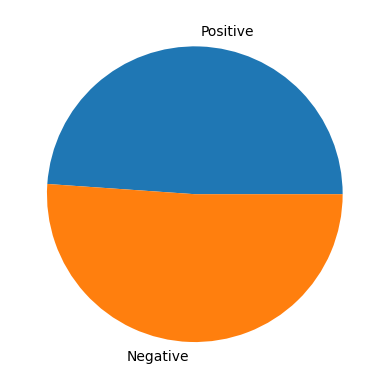

In [55]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [69]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(696, 455) (696,)


In [57]:
y_train_smote.value_counts()

Sentiment
1    348
0    348
Name: count, dtype: int64

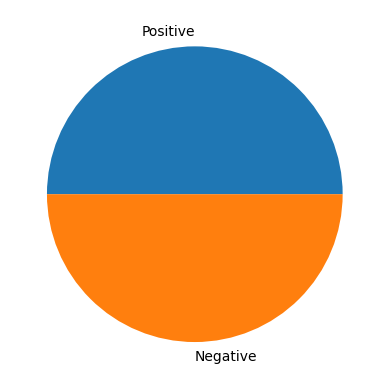

In [58]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [59]:
vectorized_X_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(696, 455), dtype=float32)

In [60]:
y_train_smote

0      1
1      1
2      0
3      1
4      0
      ..
691    0
692    0
693    0
694    0
695    0
Name: Sentiment, Length: 696, dtype: int64

In [61]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(171, 455), dtype=float32)

In [62]:
y_test

790    1
399    0
924    1
716    1
805    1
      ..
213    0
840    1
810    1
50     0
965    1
Name: Sentiment, Length: 171, dtype: int64

# Model Training and Evaluation

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [65]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)

y_test_pred = lr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.921
	Precision = 0.901
	Recall = 0.945
	F1-Score = 0.923
Testing Scores:
	Accuracy = 0.789
	Precision = 0.78
	Recall = 0.848
	F1-Score = 0.812


### Naive Bayes

In [66]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_X_train_smote)

y_test_pred = mnb.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.895
	Precision = 0.908
	Recall = 0.879
	F1-Score = 0.893
Testing Scores:
	Accuracy = 0.83
	Precision = 0.839
	Recall = 0.848
	F1-Score = 0.843


### Decision Tree

In [67]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_X_train_smote)

y_test_pred = dt.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.97
	Precision = 0.966
	Recall = 0.974
	F1-Score = 0.97
Testing Scores:
	Accuracy = 0.778
	Precision = 0.787
	Recall = 0.804
	F1-Score = 0.796


### Random Forest

In [68]:
rf = RandomForestClassifier()

rf.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_X_train_smote)

y_test_pred = rf.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.97
	Precision = 0.948
	Recall = 0.994
	F1-Score = 0.971
Testing Scores:
	Accuracy = 0.795
	Precision = 0.777
	Recall = 0.87
	F1-Score = 0.821


### Support Vector Machine 

In [69]:
svm = SVC()

svm.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_X_train_smote)

y_test_pred = svm.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.909
	Recall = 0.971
	F1-Score = 0.939
Testing Scores:
	Accuracy = 0.789
	Precision = 0.786
	Recall = 0.837
	F1-Score = 0.811


In [70]:
import pandas as pd

# Dictionary to store results
results = {}

# Function to store scores
def store_scores(model_name, y_act_train, y_pred_train, y_act_test, y_pred_test):
    results[model_name] = {
        'Train Accuracy': round(accuracy_score(y_act_train, y_pred_train), 3),
        'Test Accuracy': round(accuracy_score(y_act_test, y_pred_test), 3),
        'Precision': round(precision_score(y_act_test, y_pred_test), 3),
        'Recall': round(recall_score(y_act_test, y_pred_test), 3),
        'F1-Score': round(f1_score(y_act_test, y_pred_test), 3)
    }

# Storing results for each model
store_scores("Logistic Regression", y_train_smote, lr.predict(vectorized_X_train_smote), y_test, lr.predict(vectorized_X_test))
store_scores("Naive Bayes", y_train_smote, mnb.predict(vectorized_X_train_smote), y_test, mnb.predict(vectorized_X_test))
store_scores("Decision Tree", y_train_smote, dt.predict(vectorized_X_train_smote), y_test, dt.predict(vectorized_X_test))
store_scores("Random Forest", y_train_smote, rf.predict(vectorized_X_train_smote), y_test, rf.predict(vectorized_X_test))
store_scores("SVM", y_train_smote, svm.predict(vectorized_X_train_smote), y_test, svm.predict(vectorized_X_test))

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                     Train Accuracy  Test Accuracy  Precision  Recall  \
Logistic Regression           0.921          0.789      0.780   0.848   
Naive Bayes                   0.895          0.830      0.839   0.848   
Decision Tree                 0.970          0.778      0.787   0.804   
Random Forest                 0.970          0.795      0.777   0.870   
SVM                           0.937          0.789      0.786   0.837   

                     F1-Score  
Logistic Regression     0.812  
Naive Bayes             0.843  
Decision Tree           0.796  
Random Forest           0.821  
SVM                     0.811  


In [71]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


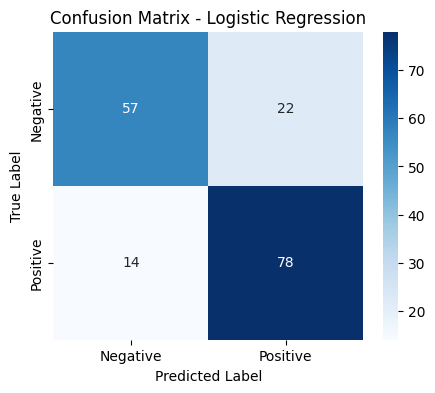

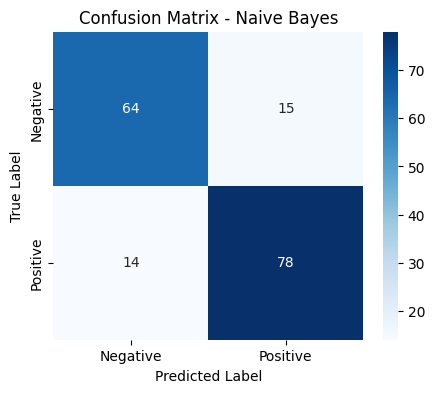

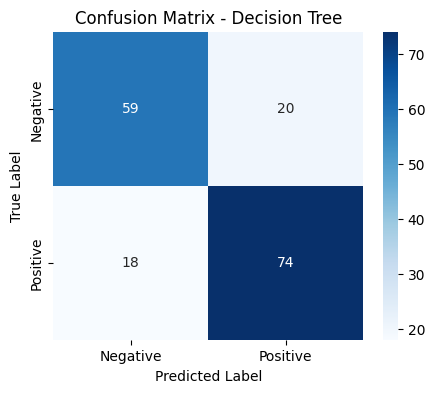

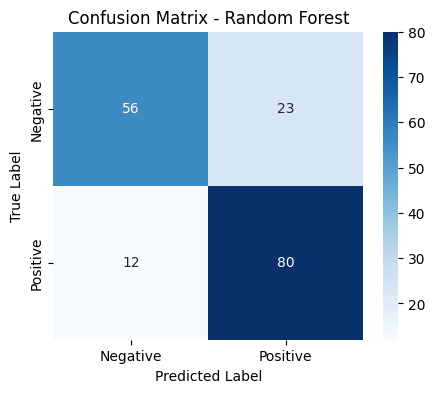

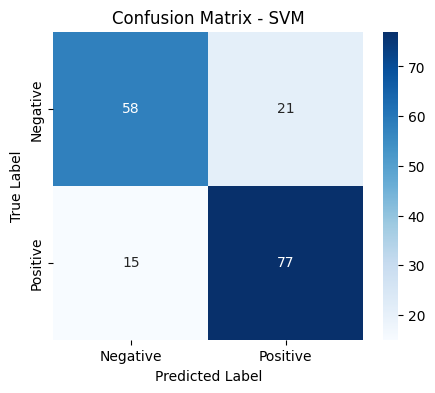

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_act, y_pred, model_name):
    cm = confusion_matrix(y_act, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, lr.predict(vectorized_X_test), "Logistic Regression")
plot_confusion_matrix(y_test, mnb.predict(vectorized_X_test), "Naive Bayes")
plot_confusion_matrix(y_test, dt.predict(vectorized_X_test), "Decision Tree")
plot_confusion_matrix(y_test, rf.predict(vectorized_X_test), "Random Forest")
plot_confusion_matrix(y_test, svm.predict(vectorized_X_test), "SVM")


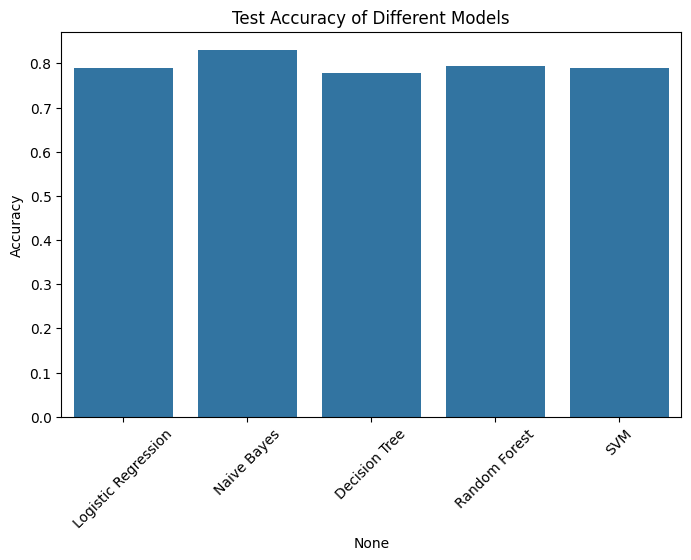

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["Test Accuracy"])
plt.xticks(rotation=45)
plt.title("Test Accuracy of Different Models")
plt.ylabel("Accuracy")
plt.show()


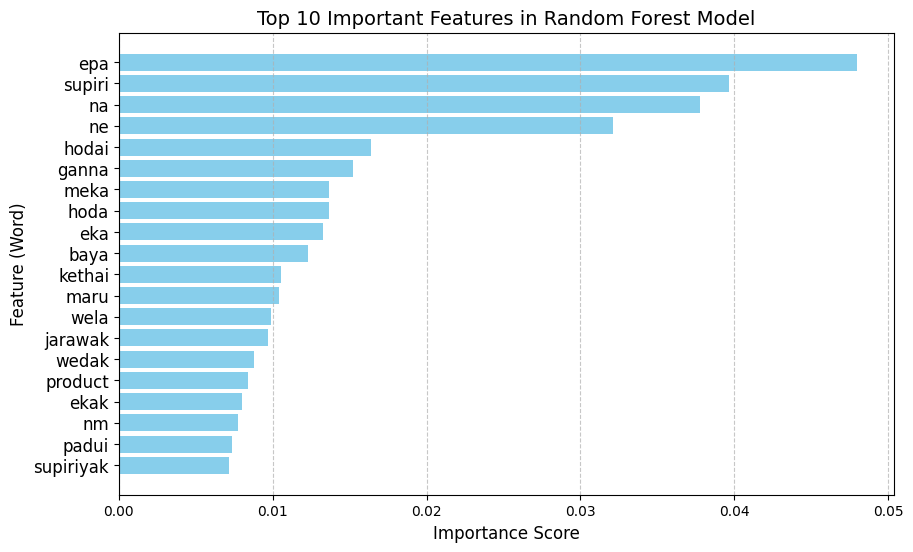

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load dataset (Ensure the CSV file is in the correct directory)
data = pd.read_csv('../artifacts/singlish_reviews.csv', encoding='ISO-8859-1')

# Check dataset structure
data.drop_duplicates(inplace=True)  # Remove duplicates
data.dropna(inplace=True)  # Remove missing values

# Extract text and labels
X = data["Review (Singlish)"].astype(str)  # Convert to string if needed
y = data["Sentiment"].astype(int)  # Convert labels to integers

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance scores
feature_importance = rf.feature_importances_

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

# Number of top features to display
top_n = 20  

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance[sorted_idx[:top_n]], color="skyblue")
plt.yticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]], fontsize=12)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature (Word)", fontsize=12)
plt.title("Top 10 Important Features in Random Forest Model", fontsize=14)
plt.gca().invert_yaxis()  # Show most important at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [303]:
with open('../static/model/vectorizer.pickle', 'wb') as file:
    pickle.dump(vectorizer, file)

In [196]:
with open('../static/model/modelmnb.pickle', 'wb') as file:
    pickle.dump(mnb, file)  # Save RandomForest instead of Naive Bayes


In [ ]:
import pickle
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)  


y_train_pred = mnb.predict(vectorized_X_train_smote)
y_test_pred = mnb.predict(vectorized_X_test)


training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)


with open('../static/model/modelmnb.pickle', 'wb') as file:
    pickle.dump(mnb, file)

print("Model saved successfully!")


In [96]:
import pickle

with open('../static/model/modeln.pickle', 'wb') as file:
    pickle.dump(lr, file)
